# Mempelajari Logistic function 


In [16]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [18]:



y = np.array([i + 0.5 * np.random.randint(20, 60) for i in range(100)])
x = []
for i in range(100):
    if y[i] < 50:
        x.append('No')
    else :
        x.append('Yes')



In [19]:
d = {'Miles_per_week' : y,
     'Completed_50m_ultra' : x}

In [20]:
df = pd.DataFrame(data=d)

In [21]:
df

,Miles_per_week,Completed_50m_ultra
0,14.5,No
1,28.5,No
2,24.0,No
3,24.5,No
4,26.5,No
...,...,...
95,118.5,Yes
96,113.5,Yes
97,107.5,Yes
98,118.5,Yes


In [22]:
finisih_race = ['No','Yes']

In [23]:
enc = OrdinalEncoder(categories=[finisih_race])

In [24]:
df['Completed_50m_ultra'] = enc.fit_transform(df[['Completed_50m_ultra']])

In [43]:
df

,Miles_per_week,Completed_50m_ultra
0,14.5,0.0
1,28.5,0.0
2,24.0,0.0
3,24.5,0.0
4,26.5,0.0
...,...,...
95,118.5,1.0
96,113.5,1.0
97,107.5,1.0
98,118.5,1.0


In [26]:
y_scatter = df['Miles_per_week']
x_scatter = df['Completed_50m_ultra']

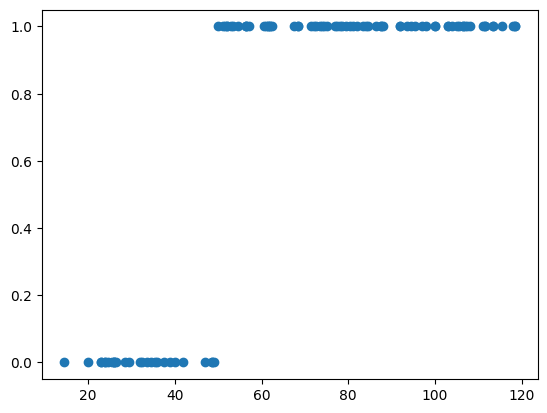

In [27]:
plt.scatter(y_scatter,x_scatter)
plt.show()

<Axes: xlabel='Completed_50m_ultra', ylabel='count'>

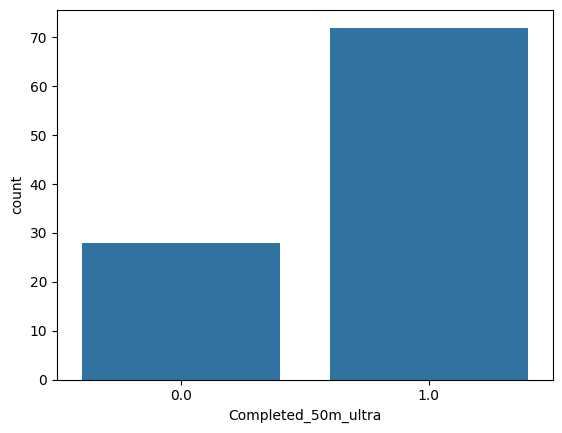

In [28]:
sns.countplot(x='Completed_50m_ultra',data = df)

In [46]:
x_data = df.iloc[:,0:1]
y_data = df.iloc[:,1]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size=0.8,random_state=3)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()

In [54]:
model.fit(x_data,y_data)

LogisticRegression()

In [55]:
y_pred = model.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
print(confusion_matrix(y_test,y_pred))

[[20  0]
 [ 0 60]]


In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        60

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

